# Machine Learning
bikin program tapi tidak tulis code secara explicit, banyak yg otomatis. jadi pakai apa? pakai data.

## Supervised
saat kita punya contoh data: fitur dan targetnya misalnya fitur [luas tanah, luas rumah] dan target [harga rumah]
- Regression
    - kita mau prediksi sebuah angka
- Classification
    - kita mau bagi data kita ke label tertentu. misalnya fitur [berat badan, tinggi badan] target [obesitas/ tidak]

# Classification
- Logistic Regression
- K Nearest Neighbor (KNN)

# Logistic Regression
menggunakan teknik regression tapi fungsi untuk garisnya adalah sigmoid function membentuk "S" yang bisa misahin data

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [132]:
# siapin data
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

print(x, x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)


In [133]:
print(y, y.shape)

[0 0 0 0 1 1 1 1 1 1] (10,)


In [134]:
# bikin model
model = LogisticRegression(solver="liblinear", random_state = 0)

In [135]:
# training model, fit
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [136]:
# bikin prediksi
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [137]:
# evaluasi akurasi model
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



contoh:  
10 data; 5 positif; 5 negatif  
prediksi 4 positif; 6 negatif

The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.  
rasio prediksi benar positif kita dibagi jumlah data yang positif; 4/5


The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives.
rasio prediksi benar negatif kita dibagi jumlah data yang negatif; 5/5

In [138]:
model.predict([[5]])

array([1])

In [139]:
# melihat ada label apa saja di model ini
model.classes_ 
# karena kita cuma ada 2 jenis label 0 dan 1
# jadi classes nya cuma ada 0 dan 1

array([0, 1])

In [140]:
# melihat probabilitas per label
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Text(0, 0.5, 'label 1 atau label 0')

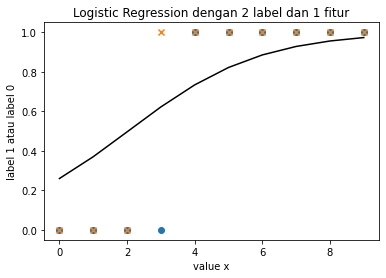

In [141]:
# visualisasi
plt.scatter(x,y)

plt.scatter(x, y_pred, marker="x")
# plt.scatter(x, model.predict_proba(x).T[1], color="black")
plt.plot(x, model.predict_proba(x).T[1], color="black")

plt.title("Logistic Regression dengan 2 label dan 1 fitur")
plt.xlabel("value x")
plt.ylabel("label 1 atau label 0")

# Confusion Matrix
melihat tingkat akurasi model

True positive\
data aslinya label gambar kucing, hasil prediksi gambar kucing
- saat label (punya diabetes) di prediksi dengan benar

False positive\
data aslinya label gambar bukan kucing, hasil prediksi kucing
- saat label (tidak punya diabetes) di prediksi salah (dia punya diabetes)

True negative\
aslinya bukan gambar kucing, hasil prediksi bukan kucing
- saat label (tidak punya diabetes) di prediksi dengan benar

False negative\
aslinya gambar kucing, prediksinya bukan kucing
- saat label (punya diabetes) di prediksi dengan salah

In [142]:
print(confusion_matrix(y, y_pred))

[[3 1]
 [0 6]]


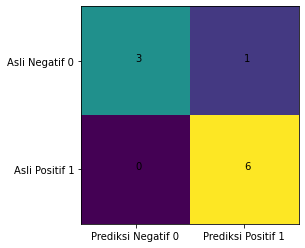

In [143]:
# visualisasi confusion matrix
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)

ax.xaxis.set(ticks=(0,1), ticklabels=('Prediksi Negatif 0', 'Prediksi Positif 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Asli Negatif 0', 'Asli Positif 1'))

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j])

## sensitivity/ recall
true positif ada 6\
total positif ada 6\
berarti, sensitivity nya adalah 6/6 = 1.0


## specificity
true negatif ada 3\
total negatif 4\
berarti, specificity nya adalah 3/4 = 0.75


## positive predictive value/ precision
true positif ada 6\
true + false positif ada 6+1=7\
bearti, rasio nya 6/7=0.86

In [144]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [30]:
# tuning, improve model nya biar lebih akurat
# bikin model
model = LogisticRegression(solver="liblinear", 
                           C=10.0,
                           random_state = 0)

# training, fit model
model.fit(x,y)

# bikin prediksi
y_pred = model.predict(x)

# evaluasi akurasi model
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Text(0, 0.5, 'label 1 atau label 0')

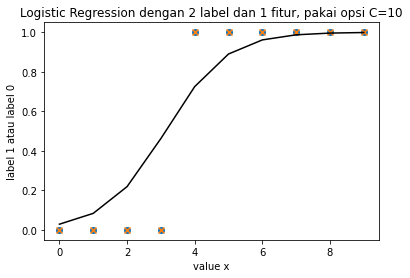

In [36]:
# visualisasi lagi
plt.scatter(x,y)

# plot hasil prediksi
plt.scatter(x,y_pred, marker="x")
plt.plot(x, model.predict_proba(x).T[1], color="black")

plt.title("Logistic Regression dengan 2 label dan 1 fitur, pakai opsi C=10")
plt.xlabel("value x")
plt.ylabel("label 1 atau label 0")

In [40]:
 model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

# Jika ada lebih dari 2 label?
misalnya ada koleksi gambar 64px, 8x8px, yang menunjukkan angka hasil tulis tangan 0,1,2,...,9

kita mau pisahkan gambarnya menjadi angka benaran di komputer, jadi ada 10 label berbeda, masing2 untuk setiap angka. ini targetnya.

## cara bikin di python?
gambarnya di convert ke bentuk numpy array. setiap pixel dapat satu angka. 1 gambar = 1 np.array yang isinya 64 angka. ini jadi 64 fitur.

## contoh
Kita ambil data dari sklearn.dataset namanya load_digits

In [146]:
# ambil data dari sklearn.datasets
from sklearn.datasets import load_digits

# bikin model pakai scikit learn linear model punya LogisticRegression
from sklearn.linear_model import LogisticRegression

# untuk cek akurasi model
from sklearn.metrics import classification_report, confusion_matrix

# tambahan supaya model lebih akurat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [147]:
# siapin data
x, y = load_digits(return_X_y=True)

print(x, x.shape)
print(y, y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64)
[0 1 2 ... 8 9 8] (1797,)


Text(0.5, 1.0, '9')

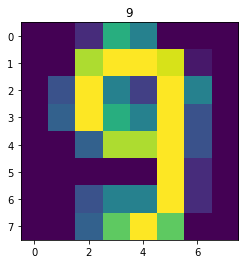

In [148]:
n= 1795
plt.imshow(x[n].reshape(8,8))
plt.title(y[n])

In [149]:
# pisahin datanya jadi 2 set: training dan testing
x_train, x_test, y_train, y_test = train_test_split(x,y,
                 random_state=0,
                 test_size=0.2) #20% data utk testing 80% untuk training

print("data training")
print(x_train, y_train)
print(x_train.shape, y_train.shape)

print("data testing")
# print(x_test, y_test)
print(x_test.shape, y_test.shape)

data training
[[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]] [6 5 3 ... 7 7 8]
(1437, 64) (1437,)
data testing
(360, 64) (360,)


In [150]:
# scale datanya jadi ada di range tertentu
scaler = StandardScaler()

# ubah data awal kita jadi yang scaled
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [151]:
# bikin model
model = LogisticRegression(
                    solver="liblinear",
                    C = 0.05,
                    multi_class='ovr')

# training model, fit
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', solver='liblinear')

In [152]:
# bikin prediksi
y_predicted = model.predict(x_test)

# evaluasi ke akuratan model kita
model.score(x_test, y_test)

0.9583333333333334

In [153]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.94      0.92        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.92      0.92      0.92        39
           9       0.97      0.90      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



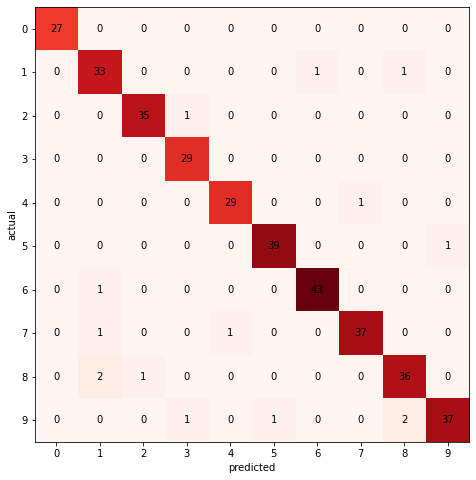

In [160]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm, cmap="Reds")
# pilihan warna imshow bisa dilihat di https://matplotlib.org/stable/tutorials/colors/colormaps.html

ax.xaxis.set(ticks=range(10))
ax.set_xlabel("predicted")

ax.yaxis.set(ticks=range(10))
ax.set_ylabel("actual")

for i in range(10):
    for j in range(10):
        ax.text(j,i, cm[i,j], ha="center", va="center", color="black")

# K-Nearest Neighbor (KNN)

mengklasifikasi data baru dengan fitur2nya dengan mencari "tetangga" dari data lainnya. k tetangga terdekat (misal k=3, maka 3 tetangga terdekat) punya label apa? label terbanyak dari 3 tetangga itu jadi label milik data baru ini.

In [84]:
# import package
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# siapin data
# Fitur 1 - cuaca
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Fitur 2 - temperatur
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label/target - main keluar atau nggak
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [87]:
print(len(weather), len(temp), len(play))

14 14 14


In [88]:
# ubah tipe data string nya jadi angka
# bikin encoder
encoder = preprocessing.LabelEncoder()

# convert data jadi angka
weather_encoded = encoder.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [89]:
encoder.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype='<U8')

Untuk data weather,\
0 = 'Overcast'\
1 = 'Rainy'\
2 = 'Sunny

In [91]:
# bikin encoder
encoder = preprocessing.LabelEncoder()

# convert data jadi angka
temp_encoded = encoder.fit_transform(temp)
print(temp_encoded)

print(encoder.classes_)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
['Cool' 'Hot' 'Mild']


Untuk data temp,\
0 = 'Cool'\
1 = 'Hot'\
2 = 'Mild'

In [92]:
# bikin encoder
encoder = preprocessing.LabelEncoder()

# convert data jadi angka
target = encoder.fit_transform(play)
print(target)

print(encoder.classes_)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
['No' 'Yes']


Untuk data target play,\
0 = 'No'\
1 = 'Yes'

In [93]:
# gabungin semua fitur jadi 1 variable
features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [95]:
# bikin model
model = KNeighborsClassifier(n_neighbors=3) # k=3

# train model, fit
model.fit(features, target)

# bikin prediksi
predicted = model.predict(features)

# evaluasi akurasi model
model.score(features, target)

0.7142857142857143

# KNN with multiple labels

In [101]:
from sklearn import datasets

wine = datasets.load_wine()

In [100]:
# ada berapa fitur
print(wine.feature_names, len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 13


In [102]:
# ada berapa label
print(wine.target_names, len(wine.target_names))

['class_0' 'class_1' 'class_2'] 3


In [103]:
# datanya
print(len(wine.data))

178


In [104]:
print(len(wine.target))

178


In [110]:
# split data jadi test data dan training data
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=0)
# 30% test data, 70% training data

print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [111]:
# bikin model
knn = KNeighborsClassifier(n_neighbors=5) #k = 5

# training model (dari training data)
knn.fit(X_train, y_train)

# bikin prediksi (dari test data)
y_pred = knn.predict(X_test)

In [112]:
# evaluasi akurasi model
knn.score(X_test, y_test)

0.7222222222222222

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7222222222222222

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.77      0.77      0.77        22
           2       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54



In [117]:
# tuning - coba bikin model tapi parameter nya beda
# misalnya jadi pakai 7 neighbor
# bikin model
knn = KNeighborsClassifier(n_neighbors=7) #k = 7

# training model (dari training data)
knn.fit(X_train, y_train)

# bikin prediksi (dari test data)
y_pred = knn.predict(X_test)

# evaluasi akurasi model
knn.score(X_test, y_test)

0.7777777777777778

In [118]:
# mau cobain dari k=1 sampai k=40  mana yang paling akurat
score_akurasi = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    score_akurasi.append(score)

Text(0, 0.5, 'Akurasi model')

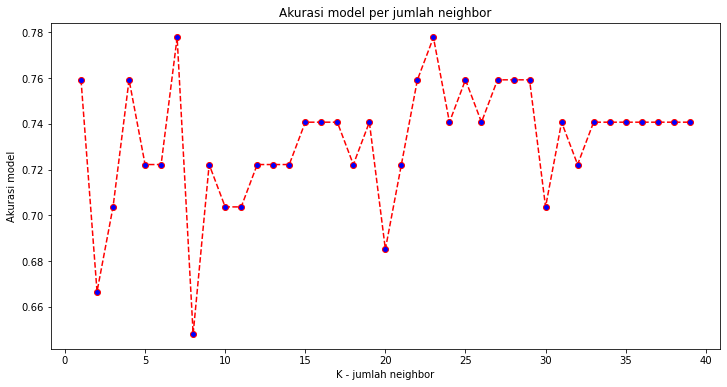

In [129]:
# plot secara visual, 
# setiap jumlah neighbor (x-axis) yg beda
# akurasinya (y-axis) berapa 

plt.figure(figsize=(12,6))
plt.plot(range(1,40), 
         score_akurasi, 
         color="red",
         linestyle="dashed",
         marker="o",
         markerfacecolor="blue")

plt.title("Akurasi model per jumlah neighbor")
plt.xlabel("K - jumlah neighbor")
plt.ylabel("Akurasi model")